# Manual Testing / Debugging


In [1]:
import sys
sys.executable

'C:\\Users\\r2d4\\miniconda3\\envs\\py3\\python.exe'

In [31]:
import seaborn as sns
from src import helpers, data_dicts

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and Clean Data

In [16]:
df = helpers.load_data("./tests/data/mock_13months_10kpi.csv")

# Check result
df.shape

(29510, 8)

In [17]:
df = helpers.trim_strings(df)
df = helpers.impute_missing_mandant_values(df)
df = helpers.impute_missing_profile_values(df)
df = helpers.replace_kpi_ids_with_kpi_names(df, data_dicts.kpi_dict)

# Check result
display(df.shape)
display(df.head())

(29510, 8)

,calculation_date,kpi,period_id,agg_level_id,agg_level_value,value,mandant,profile
0,2020-05-31,Umsatz Total,2,1,Overall,3.743112e+08,Overall,#NV
1,2020-05-31,Umsatz Total,2,2,KK,2.970695e+06,Overall,CC
2,2020-05-31,Umsatz Total,2,2,PP,3.713405e+08,Overall,PP
3,2020-05-31,Umsatz Total,2,3,BCAG KK,1.979233e+05,BCAG,CC
4,2020-05-31,Umsatz Total,2,3,Bonus Card Verbund KK,7.916932e+05,Bonus Card Verbund,CC


## Calculate Diff

In [19]:
periods_diff = helpers.fix_two_periods_for_comparison(df)

# Check results
periods_diff

(Timestamp('2020-05-31 00:00:00'), datetime.datetime(2019, 5, 31, 0, 0))

In [29]:
df_diff = helpers.create_df_diff(df, periods_diff)

# Check results
df_diff.shape

(4540, 8)

In [30]:
df_diff = helpers.pivot_df_diff_periods_to_columns(df_diff)
df_diff = helpers.calculate_diff_now_to_then(df_diff)
# Check results
display(df_diff.shape)
display(df_diff.head())


(2270, 6)

,kpi,period_id,agg_level_id,agg_level_value,mandant,diff_value
0,Nr. TRX Total,2,1,Overall,Overall,0.467871
1,Nr. TRX Total,2,2,KK,Overall,1.192588
2,Nr. TRX Total,2,2,PP,Overall,0.797687
3,Nr. TRX Total,2,3,BCAG KK,BCAG,1.935336
4,Nr. TRX Total,2,3,Bonus Card Verbund KK,Bonus Card Verbund,1.127613


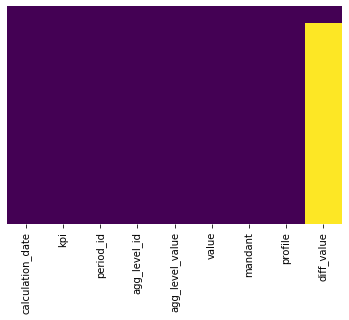

In [33]:
df = helpers.append_diff_value_column_to_original_df(df, df_diff)
df = helpers.remove_diff_values_for_non_actual_data(df, periods_diff[0])

# Check results
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [ ]:
# df.to_csv("./tests/data/mock_preprocessed.csv", index=False)

## Plotting